# Step 1: Installation and Setup

In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.14.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [5]:
from sklearn import datasets, metrics

In [7]:
# import the dataset from sklearn dataset
cancer = datasets.load_breast_cancer()

In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
# matrix of features
x = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [10]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# dependent variable
y = cancer.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [12]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
x.shape, y.shape

((569, 30), (569,))

In [14]:
# splitting the dataset in train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(455, 30)

(114, 30)

(455,)

(114,)

In [16]:
# feature scaling
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()


In [19]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [20]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [21]:
x_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [22]:
x_train.shape, x_test.shape # dataset in one dimension

((455, 30), (114, 30))

In [23]:
x_train = x_train.reshape(455, 30, 1)
x_test = x_test.reshape(114, 30, 1)

In [24]:
x_train.shape, x_test.shape # now the dataset in two dimension

((455, 30, 1), (114, 30, 1))

# Step 3: Building the Model

In [25]:
# define an object
model = tf.keras.models.Sequential()

In [27]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = (30, 1)))

# add batch normalization ( speeds up process )
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [28]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 2, activation = 'relu'))

# add batch normalization
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [29]:
# add flatten layer
model.add(tf.keras.layers.Flatten())

In [30]:
# add dense layer ( fully connected layer )
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

# output layer
model.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 32)            2080      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 32)            128       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 28, 32)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 27, 64)            4

In [32]:
# compile model
opt = tf.keras.optimizers.Adam(learning_rate = 0.00005)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = 'accuracy')

# Part 4: Training the model

In [33]:
history = model.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

Epoch 1/50
15/15 [==============================] - 4s 34ms/step - loss: 0.8362 - accuracy: 0.5560 - val_loss: 0.6693 - val_accuracy: 0.8070
Epoch 2/50
15/15 [==============================] - 0s 14ms/step - loss: 0.4676 - accuracy: 0.7890 - val_loss: 0.6393 - val_accuracy: 0.7895
Epoch 3/50
15/15 [==============================] - 0s 14ms/step - loss: 0.3072 - accuracy: 0.8703 - val_loss: 0.6136 - val_accuracy: 0.7719
Epoch 4/50
15/15 [==============================] - 0s 14ms/step - loss: 0.2177 - accuracy: 0.9231 - val_loss: 0.5881 - val_accuracy: 0.7719
Epoch 5/50
15/15 [==============================] - 0s 14ms/step - loss: 0.2117 - accuracy: 0.9187 - val_loss: 0.5635 - val_accuracy: 0.7895
Epoch 6/50
15/15 [==============================] - 0s 13ms/step - loss: 0.1834 - accuracy: 0.9407 - val_loss: 0.5361 - val_accuracy: 0.7895
Epoch 7/50
15/15 [==============================] - 0s 14ms/step - loss: 0.1707 - accuracy: 0.9385 - val_loss: 0.5083 - val_accuracy: 0.8246
Epoch 8/50
15

# Step 5: Model prediction

In [49]:
print(model.predict(x_test))

4/4 [==============================] - 0s 5ms/step
[[8.8906795e-04]
 [9.4585061e-01]
 [9.9594295e-01]
 [9.8871911e-01]
 [9.9632508e-01]
 [9.9929476e-01]
 [9.9999571e-01]
 [9.9878341e-01]
 [9.9998653e-01]
 [9.9998164e-01]
 [9.2918968e-01]
 [9.7248840e-01]
 [9.9996883e-01]
 [5.0046587e-01]
 [8.3003509e-01]
 [1.2312348e-01]
 [9.9593842e-01]
 [8.1093829e-05]
 [1.3240509e-03]
 [1.9055313e-06]
 [1.1626882e-02]
 [4.5358194e-03]
 [9.9721169e-01]
 [9.9863905e-01]
 [1.3775209e-02]
 [9.9908596e-01]
 [9.9982375e-01]
 [9.4573107e-03]
 [9.9500525e-01]
 [1.8638316e-04]
 [9.9873191e-01]
 [9.8832231e-04]
 [8.9590961e-01]
 [3.2166282e-03]
 [9.9999386e-01]
 [3.2488531e-03]
 [9.7498709e-01]
 [1.1221381e-03]
 [9.9543631e-01]
 [1.6054882e-03]
 [2.4358158e-01]
 [9.9989212e-01]
 [2.9847202e-01]
 [9.9882555e-01]
 [9.3375617e-01]
 [1.1656545e-06]
 [9.9994284e-01]
 [9.6249372e-01]
 [9.9890244e-01]
 [3.4449290e-04]
 [7.7426655e-04]
 [2.0887598e-02]
 [7.2076313e-05]
 [9.9914181e-01]
 [9.9947590e-01]
 [9.9935097e-0

In [58]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 6ms/step


In [59]:
print(y_pred[0], y_test[0]) # predicted vs original

[0] 0


In [60]:
print(y_pred[112], y_test[112]) # predicted vs original

[0] 0


In [61]:
print(y_pred[22], y_test[22]) # predicted vs original

[1] 1


In [56]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [62]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[44  3]
 [ 0 67]]


In [63]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9736842105263158


# Step 6: Learning Curve

In [64]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()

  # training vs validation accuracy
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()


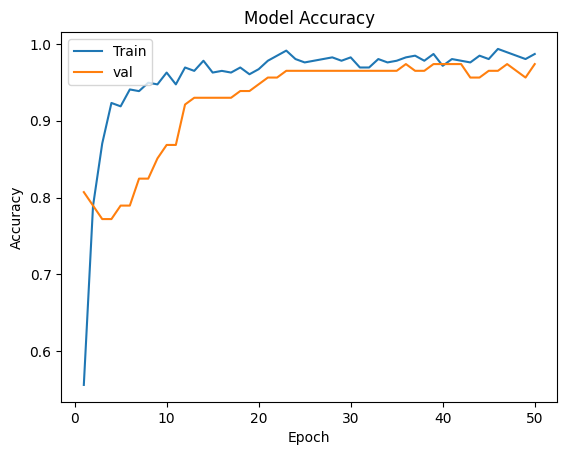

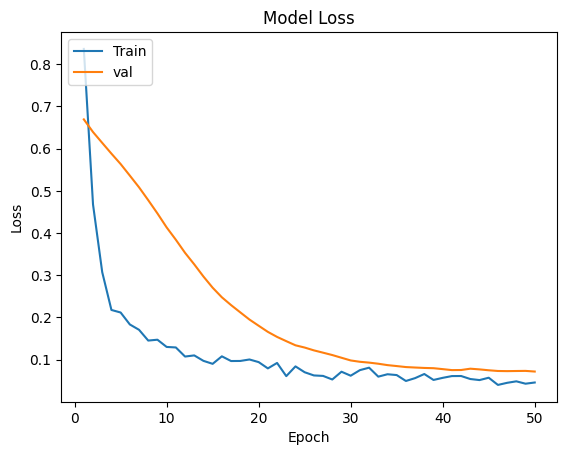

In [65]:
learning_curve(history, 50)